# Import Libraries and Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Generate a Simple Dataset

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Initialize Weights and Parameters

In [9]:
np.random.seed(42)
weights = np.random.rand(X_train.shape[1])
bias = 0
learning_rate = 0.1
epochs = 100


# Define Activation Function

In [11]:
def step_function(x):
    return 1 if x >= 0 else 0


# Train the Single-Layer ANN

In [13]:
for epoch in range(epochs):
    for i in range(len(X_train)):
        linear_output = np.dot(X_train[i], weights) + bias
        y_pred = step_function(linear_output)
        error = y_train[i] - y_pred
        weights += learning_rate * error * X_train[i]
        bias += learning_rate * error


# Test the Model

In [15]:
y_test_pred = []
for i in range(len(X_test)):
    y_pred = step_function(np.dot(X_test[i], weights) + bias)
    y_test_pred.append(y_pred)
accuracy = np.mean(y_test_pred == y_test)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.8


In [ ]:
# Visualize Decision Boundary

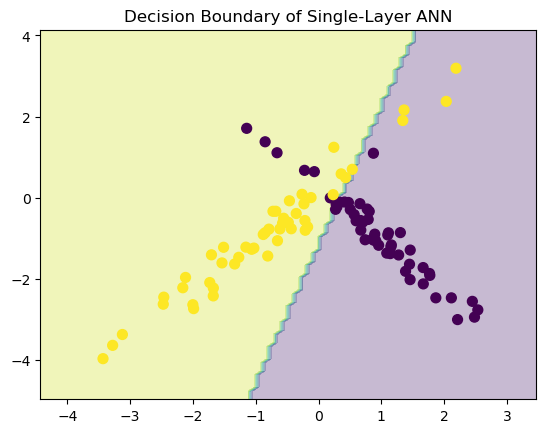

In [17]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = np.array([step_function(np.dot([x, y], weights) + bias) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.title("Decision Boundary of Single-Layer ANN")
plt.show()
